# Importing the Baisc Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


# Reading the cleaned data from csv file

In [5]:
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleancars.csv")
df.head()

,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon,MSRP
0,335.00,6,2,0,26,19,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,46135
1,300.00,6,2,0,28,19,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,40650
2,300.00,6,2,0,28,20,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,36350
3,230.00,6,2,0,28,18,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,29450
4,230.00,6,2,0,28,18,3916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,34500


In [6]:
# Splitting the data into X and y
X = df.drop("MSRP", axis=1)
y = df["MSRP"]

# Selecting features having more than 9 unqiue values
# Feature names having more tha 9 unique values
col_list = list(X.nunique()[X.nunique() > 9].index)
col_list


['Engine HP', 'highway MPG', 'city mpg', 'Popularity']

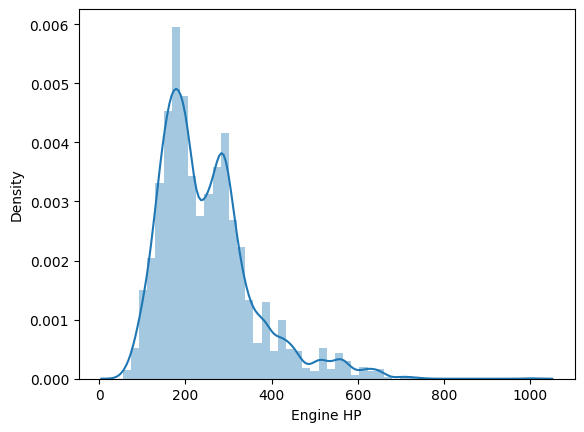

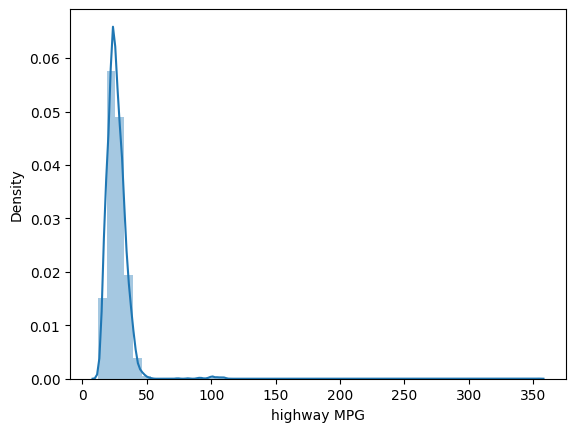

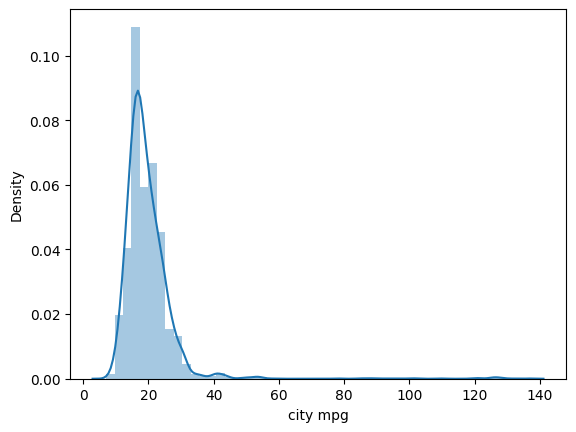

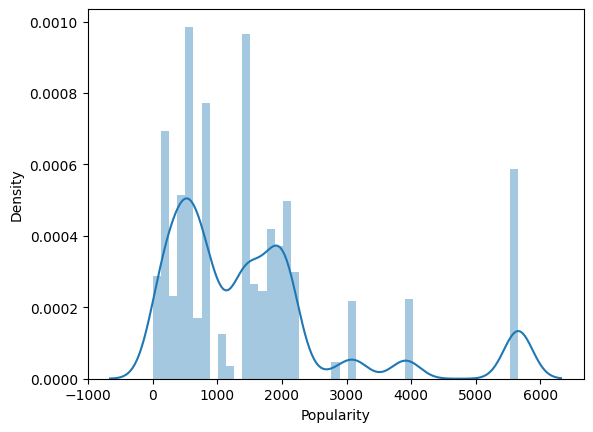

In [8]:
# Plotting the distribution of the features with more than 9 unique values
for i in col_list:
    sns.distplot(X[i])
    plt.show()


# Model Building

In [9]:
# Importing the required libraries
from sklearn.model_selection import train_test_split, cross_val_score

# Importing preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing the regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Importing the metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

"""# Scaling the data
sc = MinMaxScaler()

X_train[col_list] = sc.fit_transform(X_train[col_list])
X_test[col_list] = sc.transform(X_test[col_list])
"""

In [11]:
# Creating a list of tuples for the model names and the models

model_list = [
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=250)),
    ("Catboost", CatBoostRegressor(verbose=0)),
    ("XGB", XGBRegressor(verbosity=0)),
    ("Linear Regression", LinearRegression()),
    ("KNN", KNeighborsRegressor(n_neighbors=11)),
    ("SVR", SVR()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("ElasticNet", ElasticNet())
]

In [12]:
model_dict = {}
for model_name, model in model_list:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    model_dict[model_name] = {
        "MAE": mean_absolute_error(y_test, ypred),
        "MSE": mean_squared_error(y_test, ypred),
        "RMSE": np.sqrt(mean_squared_error(y_test, ypred)),
        "R2 Score": r2_score(y_test, ypred),
    }

# Creating a dataframe for the model metrics
model_df = pd.DataFrame(model_dict).T
model_df.sort_values(by="R2 Score", ascending=False)


,MAE,MSE,RMSE,R2 Score
Catboost,4682.42,168272541.90,12971.99,0.95
Random Forest,4046.07,221306604.96,14876.38,0.94
Decision Tree,4199.11,349892141.95,18705.40,0.90
XGB,4291.45,382624018.04,19560.78,0.89
KNN,6722.15,810346580.49,28466.59,0.77
Lasso,18592.34,1647974036.76,40595.25,0.53
Linear Regression,18594.48,1648012350.95,40595.72,0.53
Ridge,18595.17,1648217517.68,40598.25,0.53
ElasticNet,18776.25,1767622255.84,42043.10,0.50
SVR,22774.33,3602687516.76,60022.39,-0.03


In [43]:
# Created model for Decision Tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
ypred = dt.predict(X_test)

# Calculating the metrics for the model

print("MAE: ", mean_absolute_error(y_test, ypred))
print("MSE: ", mean_squared_error(y_test, ypred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, ypred)))
print("R2 Score: ", r2_score(y_test, ypred))

MAE:  5343.331088687837
MSE:  130806514.23186485
RMSE:  11437.067553873452
R2 Score:  0.9626564202279604


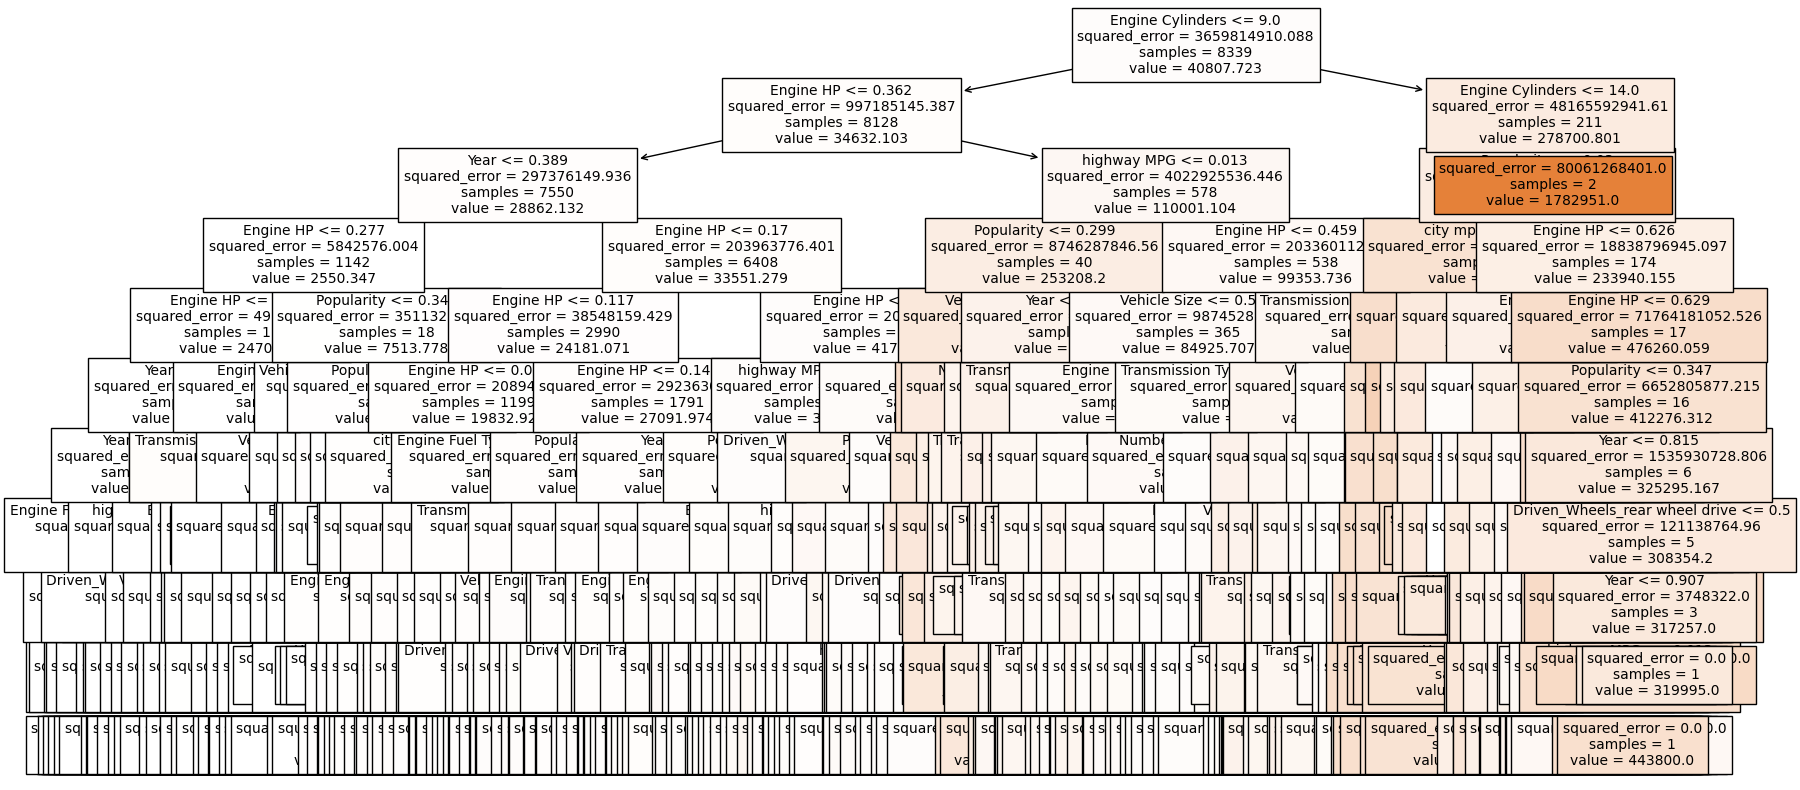

In [44]:
# Plotting Tree for the model

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, filled=True, fontsize=10)
plt.show()
